In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

In [3]:
df=pd.read_csv("COVID-19 Global Statistics Dataset.csv")
df.head()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577","334,805,269"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334","1,406,631,776"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547","65,584,518"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359","83,883,596"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146","215,353,593"


In [4]:
df.describe()

,New Deaths
count,7.000000
mean,15.857143
std,16.647608
min,1.000000
25%,2.000000
50%,6.000000
75%,31.500000
max,37.000000


In [5]:
df.tail()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN,NaN
238,Total:,"703,531,128","2,446","6,985,004",37.0,"674,303,837","5,178","22,242,287","35,695","90,256.50",896.1,NaN,NaN,NaN


In [6]:
df.sample()

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop,Population
196,Yemen,"11,945",NaN,"2,159",NaN,"9,124",NaN,662,NaN,383,69,"329,592","10,579","31,154,867"


In [7]:
df.shape


(239, 14)

Defining features X and target Y

In [8]:
X=df.iloc[:, :-1]
y=df.iloc[:, -1]

In [9]:
X

,Country,Total Cases,New Cases,Total Deaths,New Deaths,Total Recovered,New Recovered,Active Cases,"Serious, Critical",Tot Cases/1M pop,Deaths/1M pop,Total Tests,Tests/1M pop
0,USA,"111,367,209",NaN,"1,199,031",NaN,"109,053,249",NaN,"1,114,929","1,771","332,633","3,581","1,186,742,917","3,544,577"
1,India,"45,028,429",161,"533,475",2.0,NaN,NaN,NaN,NaN,"32,012",379,"935,879,495","665,334"
2,France,"40,138,560",NaN,"167,642",NaN,"39,970,918",NaN,0,NaN,"612,013","2,556","271,490,188","4,139,547"
3,Germany,"38,819,284",574,"182,439",28.0,"38,240,600",NaN,"396,245",NaN,"462,776","2,175","122,332,384","1,458,359"
4,Brazil,"38,407,327",NaN,"709,765",NaN,"36,249,161",NaN,"1,448,401",NaN,"178,345","3,296","63,776,166","296,146"
...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,Total:,"69,791,773",NaN,"1,365,551",NaN,"66,648,277",NaN,"1,777,945","8,953",NaN,NaN,NaN,NaN
235,Total:,"14,826,780","1,345","32,665",NaN,"14,572,565",NaN,"221,550",33,NaN,NaN,NaN,NaN
236,Total:,"12,859,770",NaN,"258,884",NaN,"12,089,899",NaN,"510,987",529,NaN,NaN,NaN,NaN
237,Total:,721,NaN,15,NaN,706,NaN,0,0,NaN,NaN,NaN,NaN


In [10]:
y

0        334,805,269
1      1,406,631,776
2         65,584,518
3         83,883,596
4        215,353,593
           ...      
234              NaN
235              NaN
236              NaN
237              NaN
238              NaN
Name: Population, Length: 239, dtype: object

In [11]:
y


0        334,805,269
1      1,406,631,776
2         65,584,518
3         83,883,596
4        215,353,593
           ...      
234              NaN
235              NaN
236              NaN
237              NaN
238              NaN
Name: Population, Length: 239, dtype: object

### Converting 'Total Cases' to numeric


In [16]:
df['Total Cases'] = pd.to_numeric(df['Total Cases'], errors='coerce')

In [18]:
# DROP ROWS WITH MISSING 'TOTAL CASES' VALUES
df.dropna(subset=['Total Cases'], inplace=True)

In [19]:
# Sort the df by 'Total Cases' and sleect top 10 countries
top_countries = df.sort_values(by='Total Cases', ascending=False).head(10)

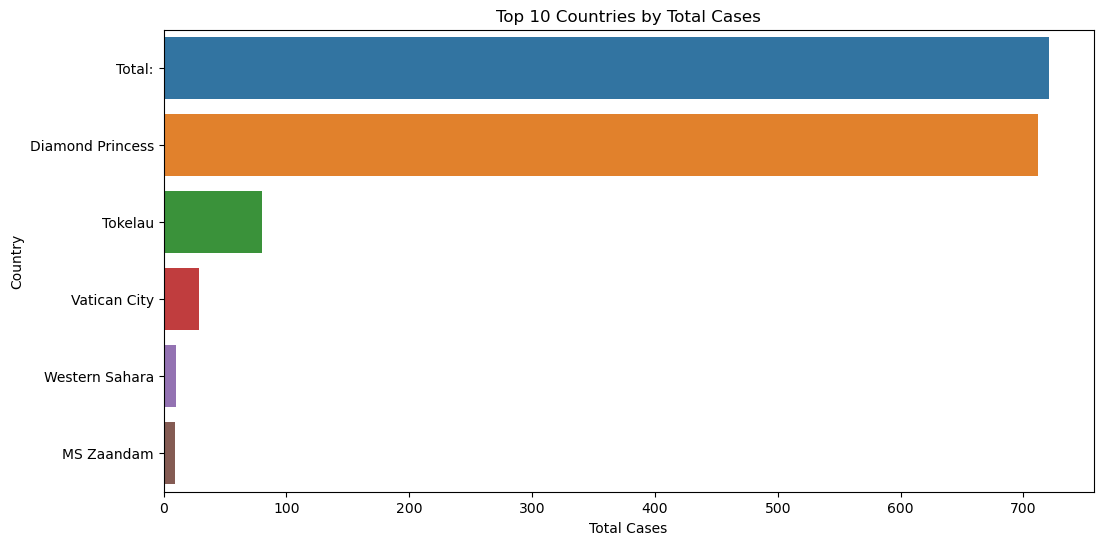

In [21]:
#Create a bar plot of total cases by country
plt.figure(figsize=(12, 6))
sns.barplot(x='Total Cases', y='Country', data=top_countries)
plt.title('Top 10 Countries by Total Cases')
plt.xlabel('Total Cases')
plt.ylabel('Country')
plt.show()

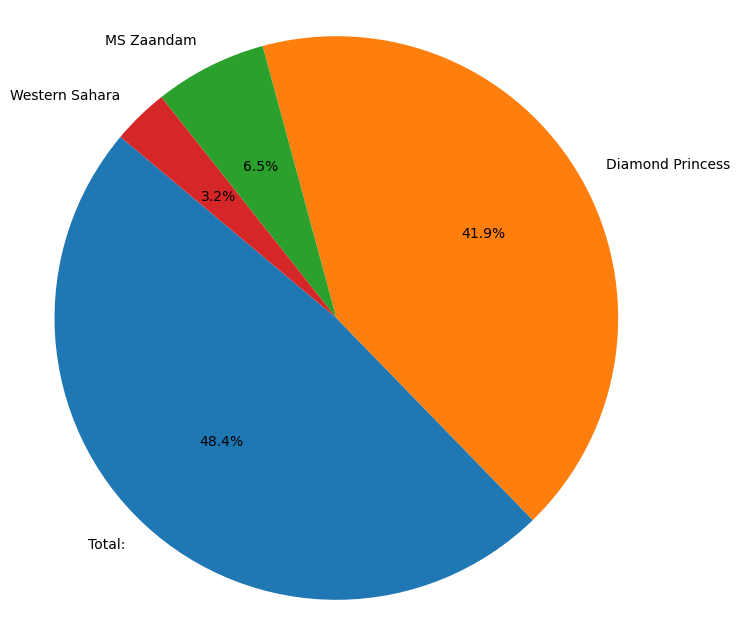

In [25]:
# Convert total deaths to numeric
df['Total Deaths'] = pd.to_numeric(df['Total Deaths'], errors='coerce')

# Drop the NaN rows that have no deaths value
df.dropna(subset=['Total Deaths'], inplace=True)

#Sort the dataframe by 'Total Deaths' and select top 10 countries
top_countries_death = df.sort_values(by='Total Deaths', ascending=False).head(10)

#Create a pie chart to show the distribution of COVID-19 deaths among the top countries
plt.figure(figsize=(8, 8))
plt.pie(top_countries_death['Total Deaths'], labels=top_countries_death['Country'], autopct='%1.1f%%', startangle=140)
plt.axis('equal') #Equal aspectg ratio ensures that pie is drawn as a circle
plt.show()